In [1]:
!pip install tensorflow matplotlib tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np


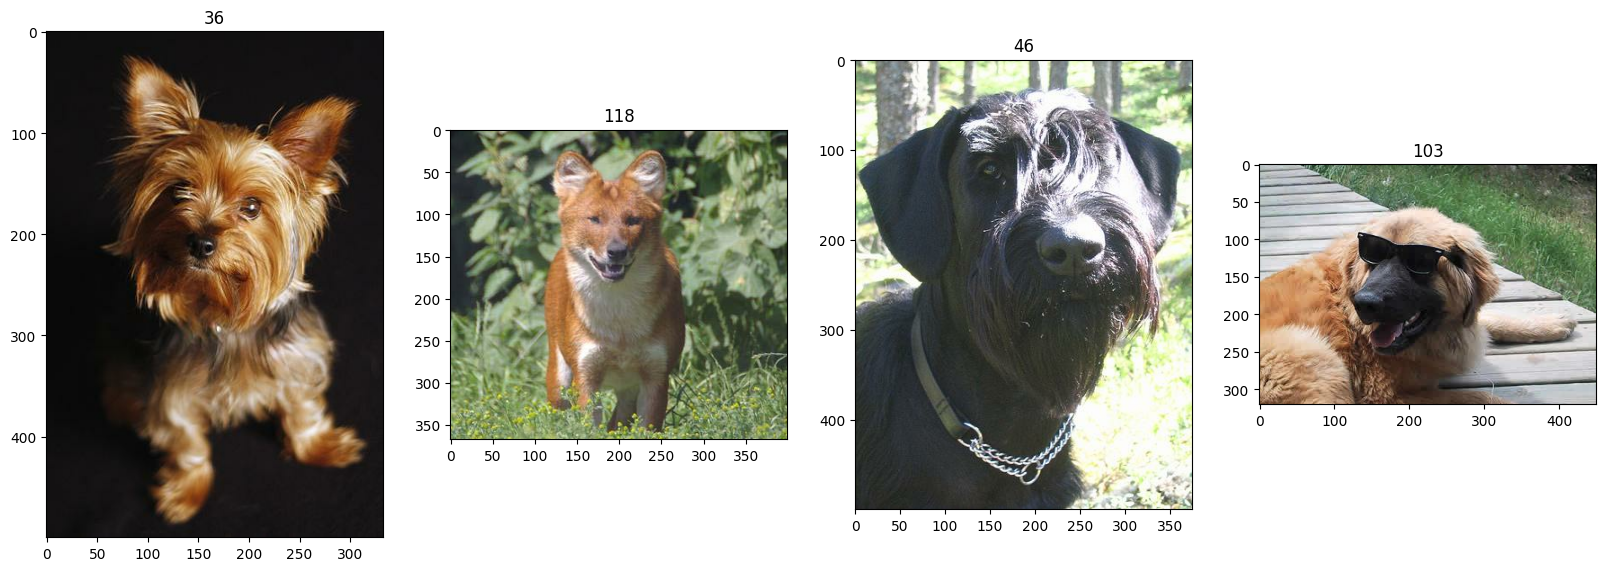

In [3]:
ds = tfds.load('stanford_dogs', split='train')

dataiterator = ds.as_numpy_iterator()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])


In [4]:
def scale_images(data): 
    image = data['image']
    image = tf.image.resize(image, (64, 64))
    return image / 255.0

ds = tfds.load('stanford_dogs', split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(10222) 
ds = ds.batch(128)
ds = ds.prefetch(64)

next_batch = ds.as_numpy_iterator().next()
print(next_batch.shape)


(128, 64, 64, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

def build_generator(): 
    model = Sequential()
    model.add(Dense(8*8*256, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(64, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(3, 5, padding='same', activation='tanh'))
    return model

generator = build_generator()
generator.summary()


C:\Users\alequ\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16384)               │       2,113,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 3)           │           4,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,142,531 (11.99 MB)

 Trainable params: 3,142,531 (11.99 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

def build_generator(): 
    model = Sequential()
    model.add(Dense(8*8*256, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(64, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(3, 5, padding='same', activation='tanh'))
    return model

generator = build_generator()
generator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 16384)               │       2,113,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 3)           │           4,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,142,531 (11.99 MB)

 Trainable params: 3,142,531 (11.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def build_discriminator(): 
    model = Sequential()
    model.add(Conv2D(64, 5, strides=2, padding='same', input_shape=(64, 64, 3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, 5, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(256, 5, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(512, 5, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
discriminator.summary()


C:\Users\alequ\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,314,753 (16.46 MB)

 Trainable params: 4,314,753 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

g_opt = Adam(learning_rate=0.0002, beta_1=0.5)
d_opt = Adam(learning_rate=0.0002, beta_1=0.5)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [9]:
from tensorflow.keras.models import Model

class DogGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        real_images = batch
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 128))
        
        with tf.GradientTape() as d_tape: 
            fake_images = self.generator(random_latent_vectors, training=True)
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            y_realfake = tf.concat([tf.ones_like(yhat_real), tf.zeros_like(yhat_fake)], axis=0)
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape: 
            fake_images = self.generator(random_latent_vectors, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            total_g_loss = self.g_loss(tf.ones_like(yhat_fake), yhat_fake) 
            
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}


In [10]:
doggan = DogGAN(generator, discriminator)
doggan.compile(g_opt, d_opt, g_loss, d_loss)

import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images.numpy()
        if not os.path.exists('images'):
            os.makedirs('images')
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

hist = doggan.fit(ds, epochs=20, callbacks=[ModelMonitor()])


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - d_loss: 0.7142 - g_loss: 0.7910
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - d_loss: 0.6943 - g_loss: 0.7214
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - d_loss: 0.6860 - g_loss: 0.7712
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - d_loss: 0.6828 - g_loss: 0.8808
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - d_loss: 0.6789 - g_loss: 0.8700
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - d_loss: 0.6725 - g_loss: 0.8985
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - d_loss: 0.6676 - g_loss: 0.8655
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - d_loss: 0.6855 - g_loss: 0.8063
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - d_loss: 0.6741 - g_loss: 0.8480
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - d_loss: 0.6754 - g_loss: 0.8561
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - d_loss: 0.6615 - g_loss: 0.8206
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - d_loss: 0

In [33]:
generator.save('generator.h5')

import os
print("Directorio actual:", os.getcwd())
print("Archivos en el directorio actual:", os.listdir())


Directorio actual: C:\Users\alequ
Archivos en el directorio actual: ['.android', '.bash_history', '.cache', '.docker', '.emulator_console_auth_token', '.expo', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', '.node_repl_history', '.VirtualBox', '.vscode', 'ansel', 'AppData', 'Configuración local', 'Contacts', 'Cookies', 'Creative Cloud Files', 'Datos de programa', 'Documents', 'Downloads', 'Entorno de red', 'FashionGAN-Tutorial.ipynb', 'Favorites', 'generator.h5', 'images', 'Impresoras', 'Links', 'logs', 'Menú Inicio', 'Mis documentos', 'Music', 'node_modules', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{b2bd6465-64c7-11ee-ba37-001a7dda7115}.TM.blf', 'NTUSER.DAT{b2bd6465-64c7-11ee-ba37-001a7dda7115}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{b2bd6465-64c7-11ee-ba37-001a7dda7115}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'package-lock.json', 'package.json', 'Plantillas', 'Reci

In [37]:
from tensorflow.keras.models import load_model

generator = load_model('generator.h5')


In [39]:
def generate_and_show_images(model, num_images=16, latent_dim=128, figsize=(12, 12), interpolation='bilinear'):
    random_latent_vectors = tf.random.normal(shape=(num_images, latent_dim))
    generated_images = model.predict(random_latent_vectors)
    generated_images = (generated_images * 127.5 + 127.5).astype(np.uint8)
    fig, ax = plt.subplots(ncols=4, nrows=4, figsize=figsize)
    for i in range(4):
        for j in range(4):
            ax[i, j].imshow(generated_images[i * 4 + j], interpolation=interpolation)
            ax[i, j].axis('off')
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


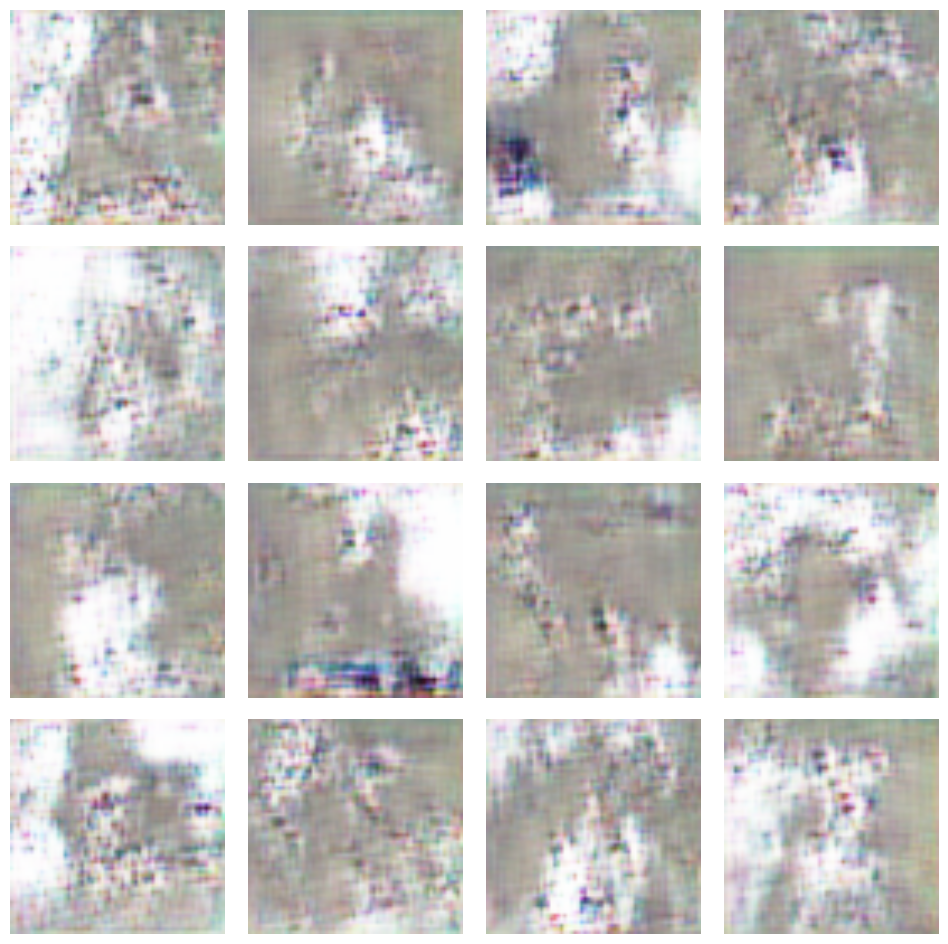

In [40]:
generate_and_show_images(generator, num_images=16, latent_dim=128, figsize=(12, 12), interpolation='bilinear')
